In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 122.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.3 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/CATvsDOG- DATA/cats_and_dogs_small"

test  train  validation


In [ ]:
train_dir = "/content/drive/MyDrive/CATvsDOG- DATA/cats_and_dogs_small/train"
val_dir   = "/content/drive/MyDrive/CATvsDOG- DATA/cats_and_dogs_small/validation"
test_dir  = "/content/drive/MyDrive/CATvsDOG- DATA/cats_and_dogs_small/test"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datag = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40 ,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)


test_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_datagenerator = train_datag.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20 ,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir ,
    target_size = (150,150),
    batch_size = 20 ,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights =  'imagenet',
                  include_top = False ,
                  input_shape = (150,150,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import optimizers


model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.RMSprop(learning_rate = 2e-5),
    metrics = ['acc']
)

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "/content/drive/MyDrive/trained_model/CNN_Project_Model-{epoch:02d}.h5"
)

In [ ]:
!ls "/content/drive/MyDrive/trained_model"

CNN_Project_Model-12.h5  CNN_Project_Model-14.h5
CNN_Project_Model-13.h5  CNN_Project_Model-15.h5


In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/CATvsDOG/CNN_Project_Model-14.h5")

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,355 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
history = model.fit(
    train_datagenerator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=[checkpoint_cb],
    initial_epoch=15
)

Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - acc: 0.6554 - loss: 0.5973 

100/100 ━━━━━━━━━━━━━━━━━━━━ 2438s 24s/step - acc: 0.6562 - loss: 0.5962 - val_acc: 0.9080 - val_loss: 0.2317
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - acc: 0.8792 - loss: 0.2976 

100/100 ━━━━━━━━━━━━━━━━━━━━ 2396s 24s/step - acc: 0.8792 - loss: 0.2975 - val_acc: 0.9390 - val_loss: 0.1425
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - acc: 0.8974 - loss: 0.2330 

100/100 ━━━━━━━━━━━━━━━━━━━━ 2417s 24s/step - acc: 0.8974 - loss: 0.2329 - val_acc: 0.9520 - val_loss: 0.1266
Epoch 12/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - acc: 0.9223 - loss: 0.1923 

100/100 ━━━━━━━━━━━━━━━━━━━━ 2405s 24s/step - acc: 0.9223 - loss: 0.1923 - val_acc: 0.9570 - val_loss: 0.1048
Epoch 13/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - acc: 0.9475 - loss: 0.1438 

100/100 ━━━━━━━━━━━━━━━━━━━━ 2416s 24s/step - acc: 0.9474 - loss: 0.1440 - val_acc: 0.9610 - val_loss: 0.0944
Epoch 14/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - acc: 0.9584 - loss: 0.1022 

100/100 ━━━━━━━━━━━━━━━━━━━━ 2410s 24s/step - acc: 0.9583 - loss: 0.1024 - val_acc: 0.9590 - val_loss: 0.1340
Epoch 15/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - acc: 0.9439 - loss: 0.1353 

100/100 ━━━━━━━━━━━━━━━━━━━━ 2420s 24s/step - acc: 0.9439 - loss: 0.1352 - val_acc: 0.9610 - val_loss: 0.1152
Epoch 16/30
  2/100 ━━━━━━━━━━━━━━━━━━━━ 40:42 25s/step - acc: 0.9875 - loss: 0.0582

KeyboardInterrupt: 

In [ ]:
import os

for f in os.listdir():
    if f.endswith(".h5"):
        print(f)


CNN_Project_Model-01.h5
CNN_Project_Model-05.h5
CNN_Project_Model-03.h5
CNN_Project_Model-02.h5
CNN_Project_Model-04.h5
CNN_Project_Model-06.h5


In [ ]:
pd.DataFrame(history.history).plot(figsize = (8 ,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

NameError: name 'history' is not defined

In [ ]:
hist_df = pd.DataFrame(history.history)

In [ ]:
hist_csv_file = 'history.csv'
with_open(hist_csv_file, mode ='w') as f:
    hist_df.to_csv(f)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20 ,
    class_mode = 'binary'
)

In [ ]:
model.evaluate_generator(test_generator , steps = 50)

**Improving Accracy of preTrained moedel**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/CATvsDOG/CNN_Project_Model-14.h5")

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,355 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/CATvsDOG- DATA/cats_and_dogs_small/train",
    target_size=(150, 150),   # must match model input
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(
    "/content/drive/MyDrive/CATvsDOG- DATA/cats_and_dogs_small/validation",
    target_size=(150, 150),   # must match model input
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
trainable = False
for layer in model.layers:
    if "block5" in layer.name or "block4" in layer.name:
        trainable = True
    layer.trainable = trainable

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# 4. Setup Callbacks
# ======================================
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "/content/drive/MyDrive/CATvsDOG/Best_VGG16_Finetuned.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
)

earlystop_cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

reduce_lr_cb = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    min_lr=1e-7
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr_cb]
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9620 - loss: 0.0862

63/63 ━━━━━━━━━━━━━━━━━━━━ 499s 8s/step - accuracy: 0.9620 - loss: 0.0862 - val_accuracy: 0.9590 - val_loss: 0.1340 - learning_rate: 1.0000e-05
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 326s 5s/step - accuracy: 0.9598 - loss: 0.0990 - val_accuracy: 0.9590 - val_loss: 0.1340 - learning_rate: 1.0000e-05
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 324s 5s/step - accuracy: 0.9743 - loss: 0.0724 - val_accuracy: 0.9590 - val_loss: 0.1340 - learning_rate: 1.0000e-05
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 325s 5s/step - accuracy: 0.9644 - loss: 0.0881 - val_accuracy: 0.9590 - val_loss: 0.1340 - learning_rate: 5.0000e-06
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 324s 5s/step - accuracy: 0.9661 - loss: 0.0828 - val_accuracy: 0.9590 - val_loss: 0.1340 - learning_rate: 5.0000e-06
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 324s 5s/step - accuracy: 0.9690 - loss: 0.0890 - val_accuracy: 0.9590 - val_loss: 0.1340 - learning_rate: 2.5000e-06
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 322s 5s/step - accuracy: 0.9694 - loss: 0.0

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/CATvsDOG- DATA/cats_and_dogs_small/test",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 173s 5s/step - accuracy: 0.9658 - loss: 0.1105
Test Accuracy: 95.90%


In [ ]:
print(train_generator.class_indices)


{'cats': 0, 'dogs': 1}


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess single image
img_path = "/content/drive/MyDrive/cat_demo.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
prob = model.predict(img_array)[0][0]

# Map back to labels
if prob > 0.5:
    print(f"Predicted: Dog 🐶 (prob={prob:.4f})")
else:
    print(f"Predicted: Cat 🐱 (prob={prob:.4f})")


NameError: name 'model' is not defined

*test dataset prediction*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


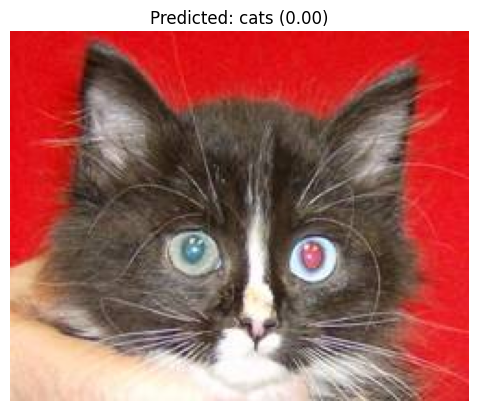

✅ True class: cats
🤖 Predicted class: cats with probability 0.0000


In [ ]:
# Load your trained model
model = load_model("/content/drive/MyDrive/CATvsDOG/Best_VGG16_Finetuned.h5")

# Define class mapping
class_indices = {'cats': 0, 'dogs': 1}
idx_to_class = {v: k for k, v in class_indices.items()}

# Path to test dataset (adjust if your test folder is different)
test_dir = "/content/drive/MyDrive/CATvsDOG- DATA/cats_and_dogs_small/test"

# Select a random class (cats or dogs)
random_class = random.choice(list(class_indices.keys()))
class_path = os.path.join(test_dir, random_class)

# Pick a random image from that class
random_img = random.choice(os.listdir(class_path))
img_path = os.path.join(class_path, random_img)

# Load and preprocess image
img = image.load_img(img_path, target_size=(150, 150))  # use same input size as training
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
prob = model.predict(img_array)[0][0]
pred_class = "dogs" if prob >= 0.5 else "cats"

# Show result
plt.imshow(image.load_img(img_path))
plt.axis("off")
plt.title(f"Predicted: {pred_class} ({prob:.2f})")
plt.show()

print(f"✅ True class: {random_class}")
print(f"🤖 Predicted class: {pred_class} with probability {prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


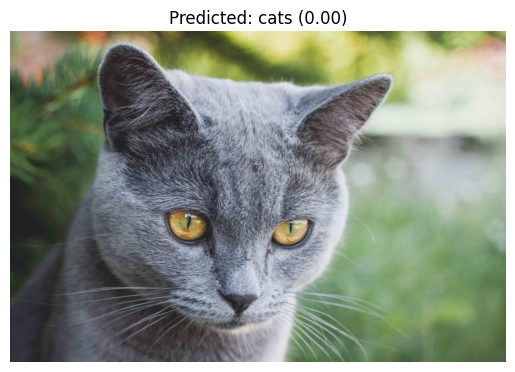

🤖 Predicted class: cats
🔢 Probability: 0.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("/content/drive/MyDrive/CATvsDOG/Best_VGG16_Finetuned.h5")

# Define mapping
class_indices = {'cats': 0, 'dogs': 1}

# Give the path of your own image (uploaded in Colab or Drive)
img_path = "/content/drive/MyDrive/catoutside.jpeg"   # 👈 replace with your file path

# Preprocess image
img = image.load_img(img_path, target_size=(150, 150))  # match training size
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
prob = model.predict(img_array)[0][0]
pred_class = "dogs" if prob >= 0.5 else "cats"

# Show result
plt.imshow(image.load_img(img_path))
plt.axis("off")
plt.title(f"Predicted: {pred_class} ({prob:.2f})")
plt.show()

print(f"🤖 Predicted class: {pred_class}")
print(f"🔢 Probability: {prob:.4f}")


In [6]:
from tensorflow.keras.models import load_model

In [8]:
old_model = load_model("/content/drive/MyDrive/CATvsDOG/Best_VGG16_Finetuned.h5", compile=False)

In [9]:
old_model.save("/content/drive/MyDrive/CATvsDOG/Best_VGG16_Finetuned.keras", save_format="keras")

In [10]:
import tensorflow as tf
print("Colab TensorFlow:", tf.__version__)

Colab TensorFlow: 2.20.0


Re-save again in Colab but force a new Sequential model reconstruction:


In [11]:
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Flatten, Dense

In [12]:
old_model = load_model("/content/drive/MyDrive/CATvsDOG/Best_VGG16_Finetuned.h5", compile=False)

In [13]:

# Rebuild Sequential model (avoids serialization bug)
new_model = Sequential()
for layer in old_model.layers:
    new_model.add(layer)

In [14]:
new_model.save("/content/drive/MyDrive/CATvsDOG/Best_VGG16_Clean.keras", save_format="keras")

In [15]:
import tensorflow as tf, keras
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.20.0
Keras version: 3.10.0
